# Dataset Description

In this competition your task is to predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly. To help you make these predictions, you're given a set of personal records recovered from the ship's damaged computer system.

## Data Field Descriptions

- ```PassengerId``` - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
- ```HomePlanet``` - The planet the passenger departed from, typically their planet of permanent residence.
- ```CryoSleep``` - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
- ```Cabin``` - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
- ```Destination``` - The planet the passenger will be debarking to.
- ```Age``` - The age of the passenger.
- ```VIP``` - Whether the passenger has paid for special VIP service during the voyage.
- ```RoomService```, ```FoodCourt```, ```ShoppingMall```, ```Spa```, ```VRDeck``` - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
- ```Name``` - The first and last names of the passenger.
- ```Transported``` - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

# Importing Data

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv('./input/train.csv')
test_data = pd.read_csv('./input/test.csv')

# Exploring Training Data

In [3]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
train_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


## Drop irrelevant columns


In [6]:
train_data = train_data.drop(["PassengerId", "Name"], axis=1)

## Cabin

Cabins are registred in "deck/num/side" form. We'll sepperate it into different columns

In [7]:
cabins = train_data.Cabin.str.split("/", expand=True)
cabins = cabins.rename(columns={0: "CabinDeck", 1: "CabinNumber", 2: "CabinSide"})
cabins.head()

,CabinDeck,CabinNumber,CabinSide
0,B,0,P
1,F,0,S
2,A,0,S
3,A,0,S
4,F,1,S


In [8]:
train_data = train_data.drop("Cabin", axis=1)
train_data = pd.concat([train_data, cabins], axis=1)

## Numerical Columns

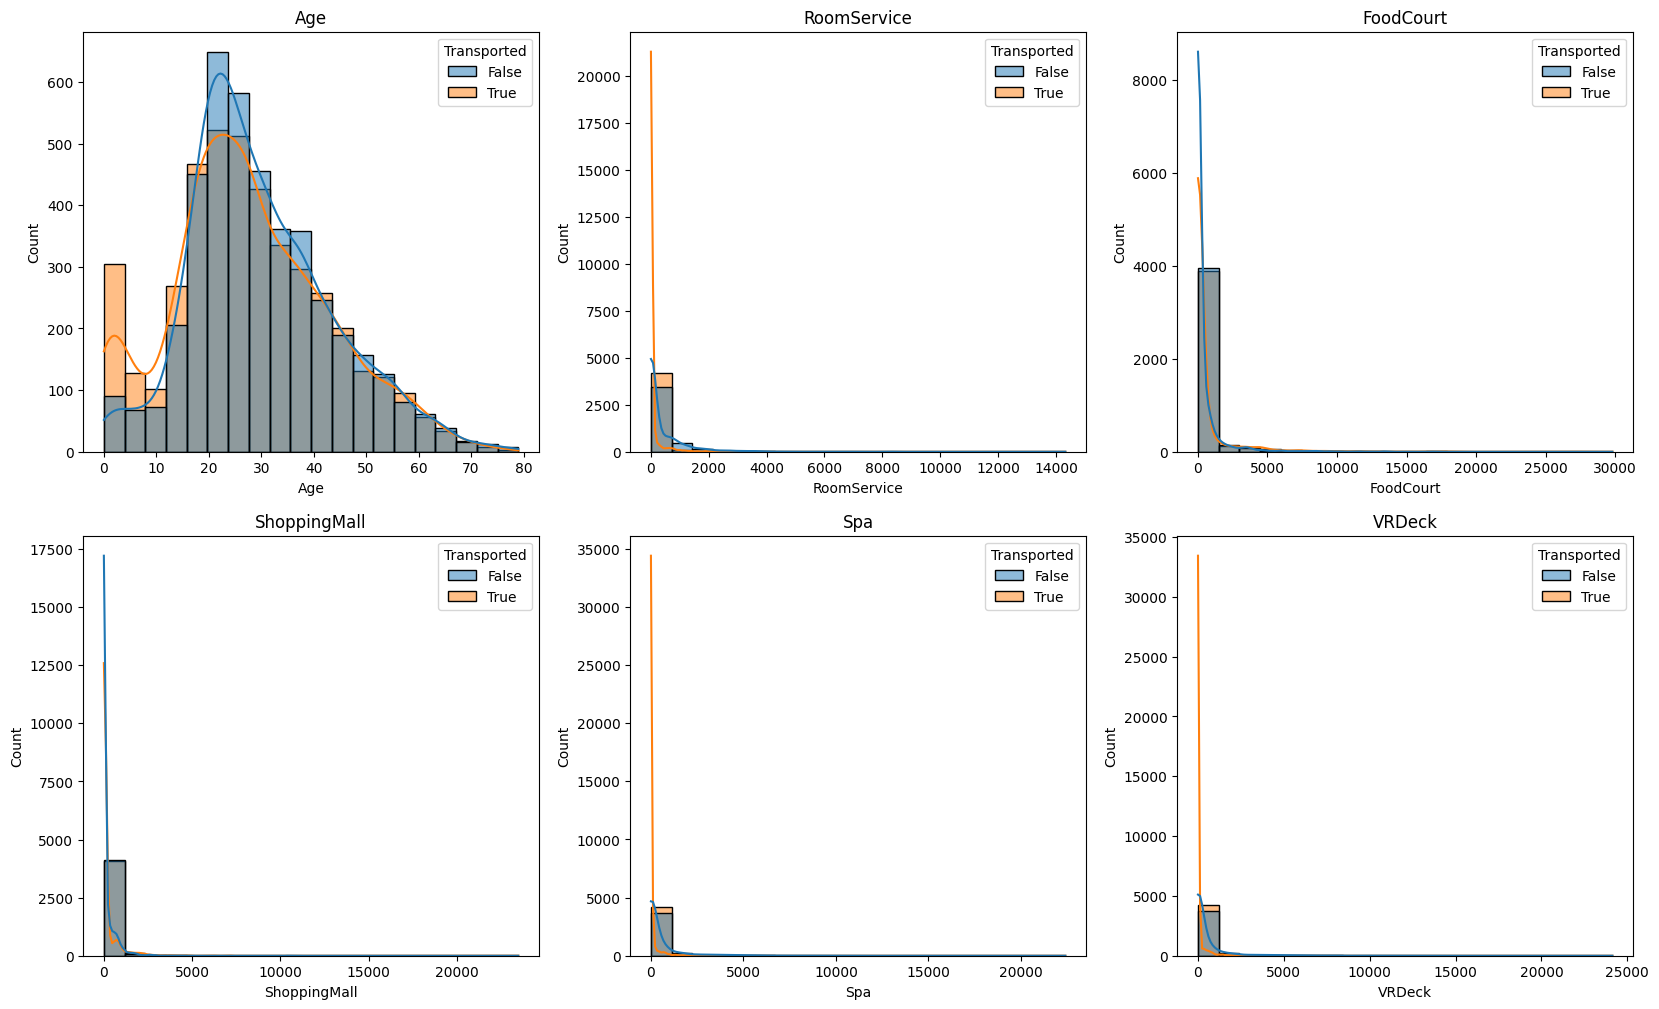

In [9]:
categories = np.reshape(["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"], (2,3))

fig, axs = plt.subplots(2, 3, figsize=(20, 12))

for i in range(2):
    for j in range(3):
        axs[i][j].set_title(categories[i][j])
        sns.histplot(x=train_data[categories[i][j]], hue=train_data.Transported, bins=20, ax=axs[i][j], kde=True)

## Categorical Columns

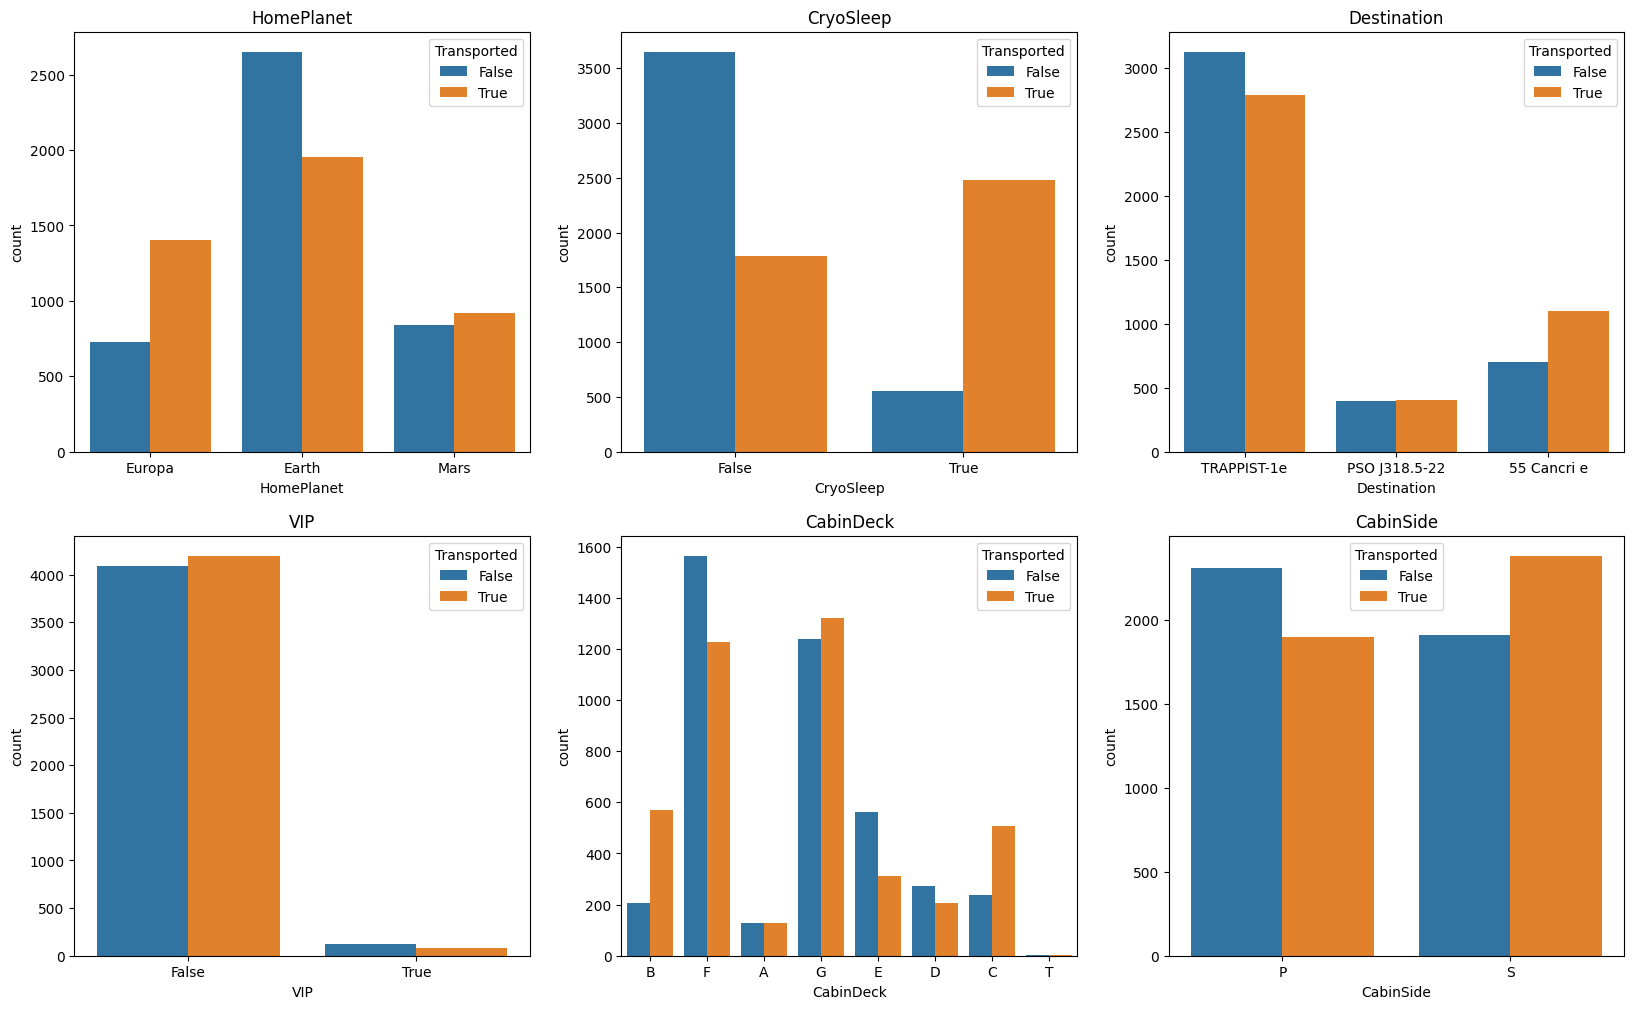

In [10]:
categories = np.reshape(["HomePlanet", "CryoSleep", "Destination", "VIP", "CabinDeck", "CabinSide"], (2,3))

fig, axs = plt.subplots(2, 3, figsize=(20, 12))

for i in range(2):
    for j in range(3):
        axs[i][j].set_title(categories[i][j])
        sns.countplot(x=train_data[categories[i][j]], hue=train_data.Transported, ax=axs[i][j])

# Model Evaluation

## Split Training Data

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(train_data.drop("Transported", axis=1), train_data.Transported, test_size = 0.2, random_state=1)

## Random Forest Classifier

First, we'll evaluate a Random Forest Classifier. We'll set up a Pipeline for imputations and encodings and then we'll use a GridSearch CV to find the best Hyperparameters and evaluate the model based on accuracy.

### Set up pipeline

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier

In [13]:
numerical_cols = X_train.select_dtypes(include='number').columns
categorical_cols = X_train.select_dtypes(include='object').columns

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='mean')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

#Bundling
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


model = RandomForestClassifier(random_state=1)

pipe = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

### GridSearch

When setting a Pipeline inside a GridSearchCV, you can access the model's parameters by calling its name followed by "\__". (e.g. "model__n_estimators")

In [14]:
from sklearn.model_selection import GridSearchCV

params = {
    "model__n_estimators" : [100, 250, 500],
    'model__max_depth': [5, 10, None],
    'model__bootstrap': [True, False]
}

cv = GridSearchCV(pipe, params, cv=5, scoring="accuracy", verbose=3)

In [15]:
cv.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[CV 1/5] END model__bootstrap=True, model__max_depth=5, model__n_estimators=100;, score=0.788 total time=   0.5s
[CV 2/5] END model__bootstrap=True, model__max_depth=5, model__n_estimators=100;, score=0.772 total time=   0.4s
[CV 3/5] END model__bootstrap=True, model__max_depth=5, model__n_estimators=100;, score=0.784 total time=   0.4s
[CV 4/5] END model__bootstrap=True, model__max_depth=5, model__n_estimators=100;, score=0.779 total time=   0.4s
[CV 5/5] END model__bootstrap=True, model__max_depth=5, model__n_estimators=100;, score=0.776 total time=   0.4s
[CV 1/5] END model__bootstrap=True, model__max_depth=5, model__n_estimators=250;, score=0.786 total time=   1.2s
[CV 2/5] END model__bootstrap=True, model__max_depth=5, model__n_estimators=250;, score=0.771 total time=   1.2s
[CV 3/5] END model__bootstrap=True, model__max_depth=5, model__n_estimators=250;, score=0.786 total time=   1.2s
[CV 4/5] END model__bootstrap=True, model__max_depth=5, model__n_estimators=250;, score=0.779 to

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         SimpleImputer(),
                                                                         Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ordinal',
                                                                                          OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                                         unknown_value=-1))]),
                                                                         Index(['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'CabinDeck',
       'CabinNumber', 'CabinSide'],
      dtype='object'))])),
                                       ('model',
                                        RandomForestClassifier(random_state=1))]),
             param_grid={'model__bootstrap': [True, False],
                         'model__max_depth': [5, 10, None],
                         'model__n_estimators': [100, 250, 500]},
             scoring='accuracy', verbose=3)

In [16]:
results = pd.DataFrame(cv.cv_results_).sort_values("rank_test_score").head()
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__bootstrap,param_model__max_depth,param_model__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
5,4.410749,0.014671,0.110751,0.003239,True,10,500,"{'model__bootstrap': True, 'model__max_depth':...",0.803738,0.801582,0.803738,0.793674,0.795683,0.799683,0.004210,1
3,0.938248,0.012253,0.029218,0.001461,True,10,100,"{'model__bootstrap': True, 'model__max_depth':...",0.800863,0.805895,0.803019,0.793674,0.792086,0.799107,0.005353,2
13,2.471183,0.072726,0.058394,0.002734,False,10,250,"{'model__bootstrap': False, 'model__max_depth'...",0.805176,0.800863,0.797268,0.794393,0.796403,0.798820,0.003806,3
4,2.355217,0.131436,0.061687,0.003784,True,10,250,"{'model__bootstrap': True, 'model__max_depth':...",0.805895,0.798706,0.802301,0.792955,0.793525,0.798676,0.004990,4
12,0.979296,0.018809,0.028175,0.001187,False,10,100,"{'model__bootstrap': False, 'model__max_depth'...",0.805895,0.801582,0.795830,0.792236,0.791367,0.797382,0.005571,5


Since the time difference between the first and second models is almost 3 seconds and the mean score difference is low (~0.05%), we'll choose the second model's parameters to predict the final data.

# Final Model

In [17]:
final_params = results[results["rank_test_score"] == 2].params[3]

finalModel = RandomForestClassifier(
    random_state=1,
    bootstrap=final_params['model__bootstrap'],
    max_depth=final_params['model__max_depth'],
    n_estimators=final_params['model__n_estimators']
)

final_pipe = Pipeline(steps=[('preprocessor', preprocessor), ('model', finalModel)])

In [18]:
final_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  Index(['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'CabinDeck',
       'CabinNumber', 'CabinSide'],
      dtype='object'))])),
                ('model',
                 RandomForestClassifier(max_depth=10, random_state=1))])

### Rearrange Test data

In [19]:
passengerIds = test_data["PassengerId"]

test_data = test_data.drop(["PassengerId", "Name"], axis=1)

test_cabins = test_data.Cabin.str.split("/", expand=True)
test_cabins = test_cabins.rename(columns={0: "CabinDeck", 1: "CabinNumber", 2: "CabinSide"})

test_data = test_data.drop("Cabin", axis=1)
test_data = pd.concat([test_data, test_cabins], axis=1)

test_data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CabinDeck,CabinNumber,CabinSide
0,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,G,3,S
1,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,F,4,S
2,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,C,0,S
3,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,C,1,S
4,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,F,5,S


In [20]:
test_data_predictions = final_pipe.predict(test_data)

In [21]:
submission = pd.DataFrame({'PassangerId': passengerIds, 'Transported': test_data_predictions})
submission.to_csv('./output/submission.csv', index=False)
print("Successfuly created csv")

Successfuly created csv
